 ADS Assignment 9.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV  
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [8]:
numerical_continuous = []
for column in df.columns:
            if df[column].nunique() >= 10:
                numerical_continuous.append(column)
numerical_continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [9]:
numerical_discrete = []
for column in df.columns:
        if df[column].nunique() < 10:
            numerical_discrete.append(column)
numerical_discrete

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

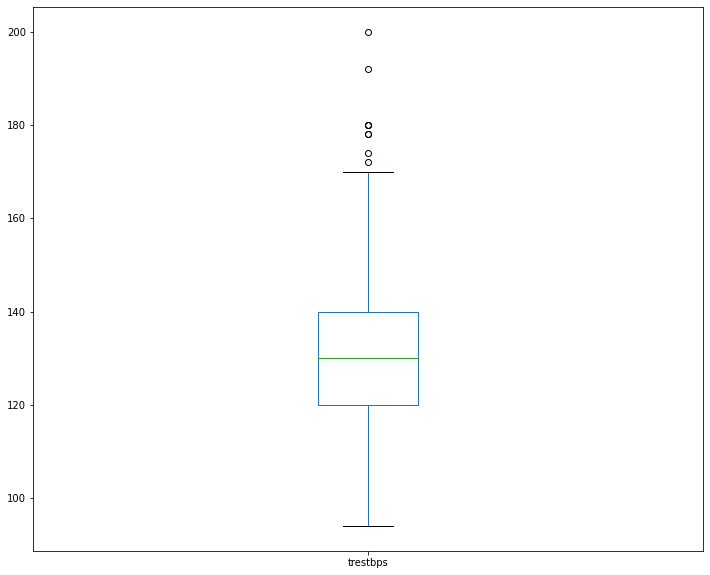

In [10]:
df["trestbps"].plot(kind = 'box', figsize = (12, 10))

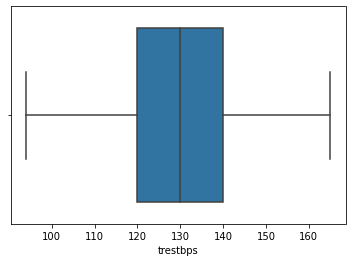

In [11]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.trestbps)
df = df.loc[(df.trestbps > lower) & (df.trestbps < upper)]

sns.boxplot(df.trestbps)

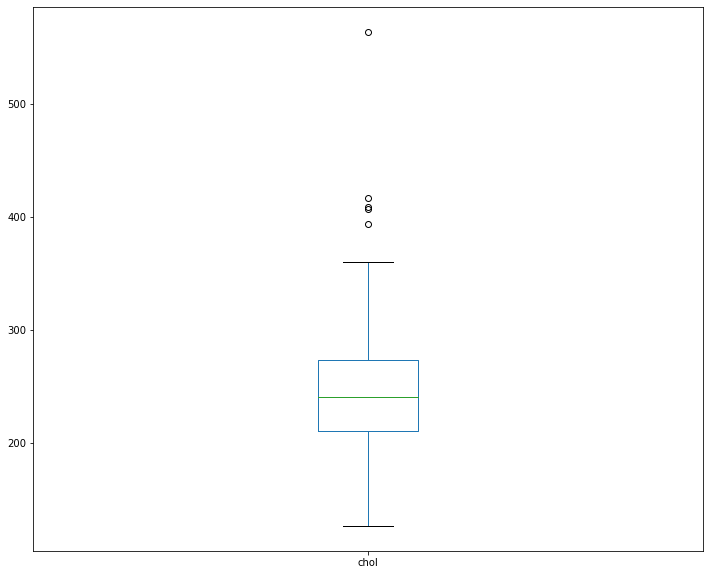

In [12]:
df["chol"].plot(kind = 'box', figsize = (12, 10))

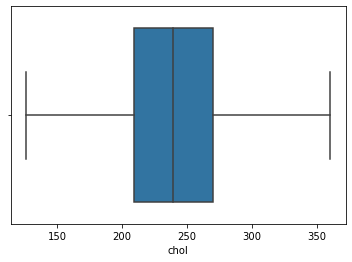

In [13]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.chol)
df = df.loc[(df.chol > lower) & (df.chol < upper)]

sns.boxplot(df.chol)

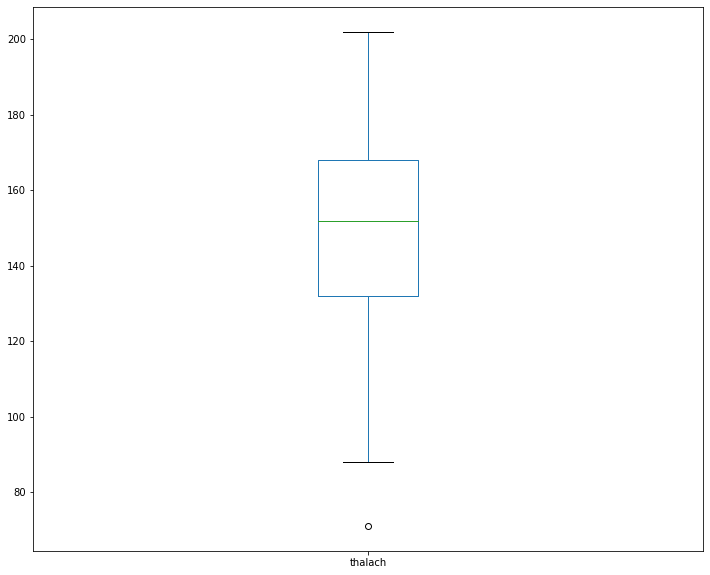

In [14]:
df["thalach"].plot(kind = 'box', figsize = (12, 10))

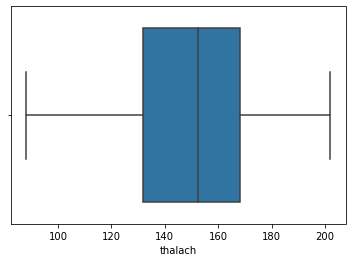

In [15]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.thalach)
df = df.loc[(df.thalach > lower) & (df.thalach < upper)]

sns.boxplot(df.thalach)

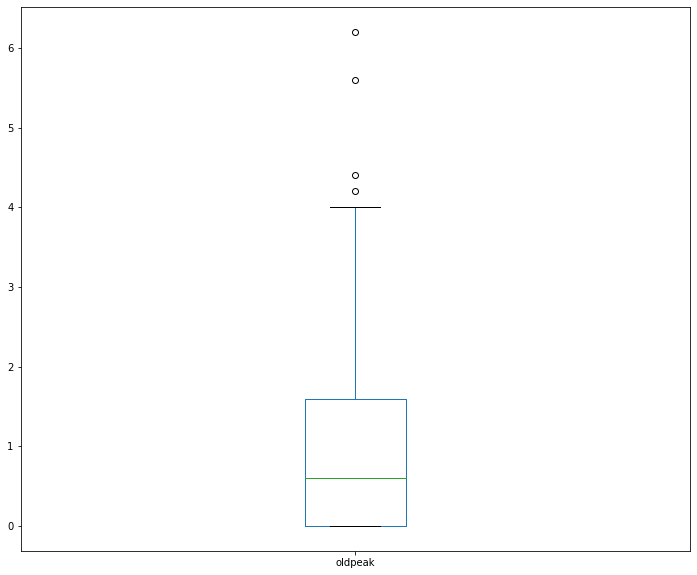

In [16]:
df["oldpeak"].plot(kind = 'box', figsize = (12, 10))

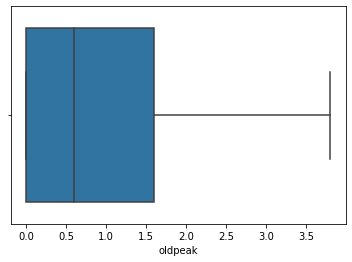

In [17]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.oldpeak)
df = df.loc[(df.oldpeak > lower) & (df.oldpeak < upper)]

sns.boxplot(df.oldpeak)

In [18]:
#4. Binned the continuous column values apart from the column ‘oldpeak’.


In [19]:
#import numpy_indexed as npi
#pd.cut((np.digitize(numerical_continuous,bins)).mean(numerical_continuous))
# it worked and now it can't import the packages 

In [20]:
#5. Separate the features from the labels and use the most appropriate feature selection
#technique(s).


In [21]:
y = df.iloc[:,[-1]]
X = df.drop(y.columns, axis = 1)

In [22]:
#6. Slice the data and scale the features.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((209, 13), (70, 13), (209, 1), (70, 1))

In [24]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
#7. Identify the data if the data is balanced. If not, sample the data using the most appropriate
#method keeping the size of the data in mind.

In [26]:
#checking for imbalanced data(Random Undersampling / Oversampling (SMOTE))

imb_data= X[X == 0].count() / X.count()

print(imb_data)

age         0.000000
sex         0.301075
cp          0.455197
trestbps    0.000000
chol        0.000000
fbs         0.860215
restecg     0.473118
thalach     0.000000
exang       0.688172
oldpeak     0.344086
slope       0.053763
ca          0.580645
thal        0.007168
dtype: float64


In [27]:

#8. Using at least 4 classification methods, identify the best machine learning model using their
#training and testing accuracy scores.

In [28]:
# Models to be tested: Logistic Regression, KNearest, SVM, Decision Tree, Random Forest

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier()
}


In [30]:
#Compute the training score of each models

train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    train_score = round(classifier.score(X_train, y_train),2)
    train_scores.append(train_score)
    test_score = round(classifier.score(X_test, y_test),2)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.85, 0.89, 0.93, 1.0]
[0.84, 0.83, 0.83, 0.7]


In [31]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = cross_val_predict(rf,X_test,y_test, cv=5)
print(roc_auc_score(y_test, rf_pred))

0.7977777777777779


In [32]:
#9. Hyper parameter tune the best model using grid search to identify the best performing
#model.

In [33]:
#SVC

svc = SVC()
svc_params = {"C": [0.5, 0.7, 0.9, 1], "kernel":['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(svc, svc_params)
grid_svc.fit(X_test,y_test)
svc_best = grid_svc.best_estimator_

In [34]:
classifier_tree = SVC()

y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)


In [35]:
#10. Redefine the model instance based on the grid search results, train it and evaluate it using:
#a. A classification report.
#b. A visual representation and well labelled confusion matrix.
#c. AUC score. (Explain the score in a markdown cell.)
#d. ROC curve.

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predict))



              precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.88      0.84      0.86        45

    accuracy                           0.83        70
   macro avg       0.81      0.82      0.82        70
weighted avg       0.83      0.83      0.83        70



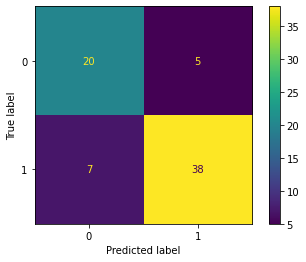

In [37]:
from sklearn.metrics import plot_confusion_matrix
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  


0.7977777777777779


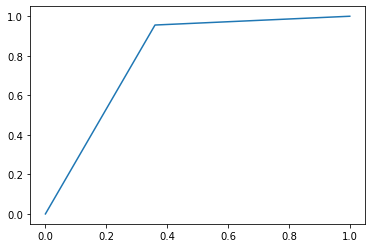

In [38]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier()
rf.fit( X_test, y_test)
rf_pred = cross_val_predict(rf,  X_test, y_test, cv=5)
print(roc_auc_score(y_test, rf_pred))

fpr, tpr, _ = roc_curve(y_test, rf_pred)
plt.plot(fpr, tpr)
plt.show()

In [39]:
#11. Based on the results on the ROC curve, which threshold would be ideal given the nature of
#the data? (Explain in a markdown cell.)

a threshhold of 0.3 would be ideal for the model

In [40]:
#12. Save the model as ‘classification_model’.

In [41]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(y_predict, open(filename, 'wb'))
 